In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

sns.set_theme(style="darkgrid", palette= 'muted')
%matplotlib inline

**Exploratory Data Analysis**

Data overview
- PassengerId: Unique id for each passenger. No effect on the target feature.
- Survived: Whether or not the passenger survived. This is the target feature.
  - 0 = No, 1 = Yes
- Pclass: Reflects the socio-economic status of the passenger.
  - 1 = 1st, Upper Class
  - 2 = 2nd, Middle Class
  - 3 = 3rd, Lower Class
- Name: The name of the passenger. Includes the title of the passenger, such as "Mr.", "Mrs.", and "Master.".
- Sex: Gender of the passenger, either "male" or "female".
- Age: The age of the passenger in years.
- SibSp: # of siblings / spouses aboard the Titanic.
- Parch: # of parents / children aboard the Titanic.
- Ticket: The Ticket number.
- Fare: Passenger fare.
- Cabin: Cabin number of the passenger.
- Embarked: Which port the passenger embarked from.
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton

In [ ]:
path1 = '/content/drive/MyDrive/Datasets/Internship/Task-02/train.csv'
path2 = '/content/drive/MyDrive/Datasets/Internship/Task-02/test.csv'

train_data = pd.read_csv(path1)
test_data = pd.read_csv(path2)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Features and Survival

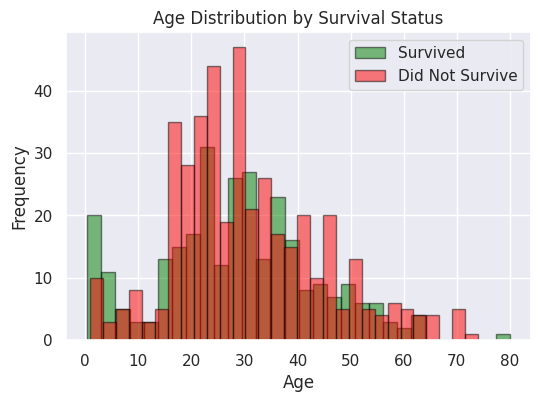

In [ ]:
plt.figure(figsize=(6, 4))

plt.hist(train_data[train_data['Survived'] == 1]['Age'], bins=30, alpha=0.5, label='Survived', color='green', edgecolor='black')
plt.hist(train_data[train_data['Survived'] == 0]['Age'], bins=30, alpha=0.5, label='Did Not Survive', color='red', edgecolor='black')

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

- Younger passengers, especially those < 5 years old, seem to survive at a higher rate.
- Older passengers seem to have a lower survival rate, especially around 40 - 75 years old.

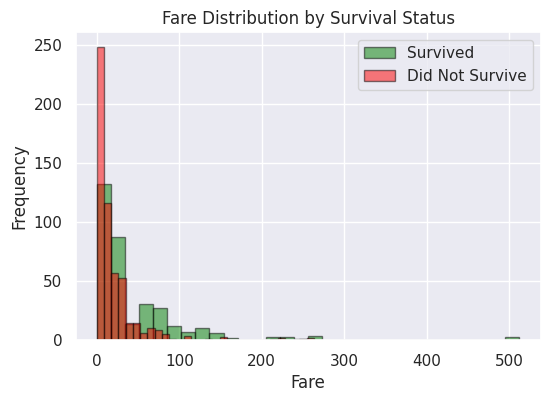

In [ ]:
plt.figure(figsize=(6, 4))

plt.hist(train_data[train_data['Survived'] == 1]['Fare'], bins=30, alpha=0.5, label='Survived', color='green', edgecolor='black')
plt.hist(train_data[train_data['Survived'] == 0]['Fare'], bins=30, alpha=0.5, label='Did Not Survive', color='red', edgecolor='black')

plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

- Lower fares seemed to have survived less.
- Higher fares seemed to survive more.
- This can be correlated with the socio-economic status of the passenger.

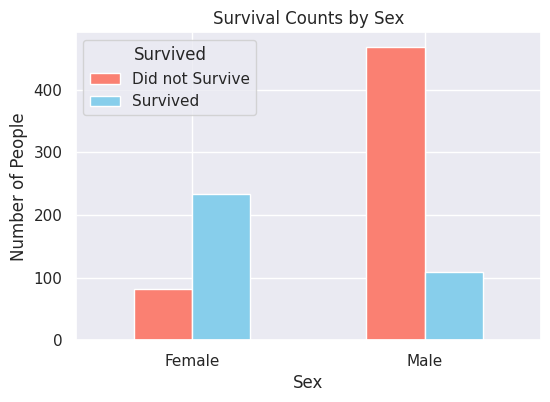

In [ ]:
df = train_data.copy()
df['Sex_Label'] = df['Sex'].map({'male': 'Male', 'female': 'Female'})

survival_counts = df.groupby(['Sex_Label', 'Survived']).size().unstack()
survival_counts.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])

plt.title('Survival Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Did not Survive', 'Survived'])
plt.grid(True)

- Females have a higher rate of survival than Males.

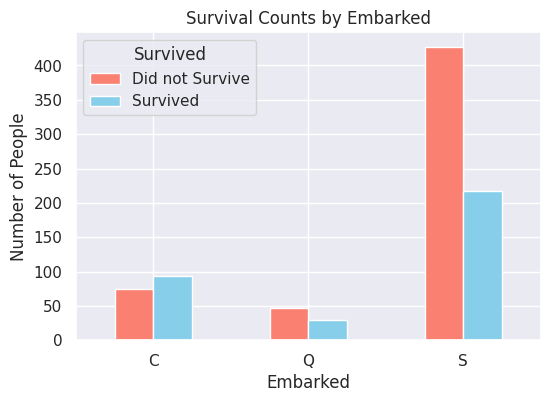

In [ ]:
survival_counts = train_data.groupby(['Embarked', 'Survived']).size().unstack()

survival_counts.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])

plt.title('Survival Counts by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Did not Survive', 'Survived'])
plt.grid(True)

- Those who embarked from "S" had the lowest rate of survival.
- Those who embarked from "C" had the highest rate to survive.

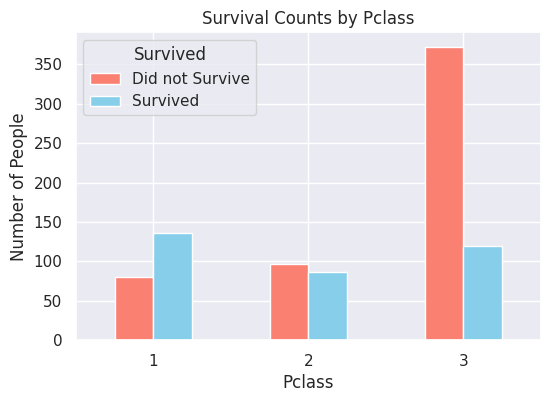

In [ ]:
survival_counts = train_data.groupby(['Pclass', 'Survived']).size().unstack()

survival_counts.plot(kind='bar', stacked=False, figsize=(6, 4), color=['salmon', 'skyblue'])

plt.title('Survival Counts by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Did not Survive', 'Survived'])
plt.grid(True)

- 1st class passengers have a high chance of survival, while 3rd class passengers have a high chance of dying.
- Socio-economic status seems to play a part for survival.

**Filling in missing values**

In [ ]:
all_data = pd.concat([train_data, test_data])

In [ ]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Name          1309 non-null   object 
 4   Sex           1309 non-null   int64  
 5   Age           1309 non-null   float64
 6   SibSp         1309 non-null   int64  
 7   Parch         1309 non-null   int64  
 8   Ticket        1309 non-null   object 
 9   Fare          1309 non-null   float64
 10  Cabin         295 non-null    object 
 11  Embarked      1309 non-null   object 
 12  Deck          1309 non-null   object 
 13  CabinMissing  1309 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 153.4+ KB


In [ ]:
all_data.isna().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


- Missing values in all_data:

  - Survived (418 missing values)
  - Cabin (1014 missing values)

In [ ]:
all_data.loc[:,['Cabin', 'Survived']].dtypes

,0
Cabin,object
Survived,float64


In [ ]:
col = all_data.loc[:, ['Cabin', 'Survived']]
col.head()

,Cabin,Survived
0,NaN,0.0
1,C85,1.0
2,NaN,1.0
3,C123,1.0
4,NaN,0.0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Define the imputers for different data types
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, ['Survived']),
        ('cat', categorical_imputer, ['Cabin'])
    ])

# Apply the transformer to the DataFrame
imputed_data = preprocessor.fit_transform(col)

imputed_data

array([[0.0, 'C23 C25 C27'],
       [1.0, 'C85'],
       [1.0, 'C23 C25 C27'],
       ...,
       [0.3838383838383838, 'C23 C25 C27'],
       [0.3838383838383838, 'C23 C25 C27'],
       [0.3838383838383838, 'C23 C25 C27']], dtype=object)

In [ ]:
all_data['Survived'] = imputed_data[:,0].astype(float)
all_data['Cabin'] = imputed_data[:,1]

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      1309 non-null   float64
 2   Pclass        1309 non-null   int64  
 3   Name          1309 non-null   object 
 4   Sex           1309 non-null   int64  
 5   Age           1309 non-null   float64
 6   SibSp         1309 non-null   int64  
 7   Parch         1309 non-null   int64  
 8   Ticket        1309 non-null   object 
 9   Fare          1309 non-null   float64
 10  Cabin         1309 non-null   object 
 11  Embarked      1309 non-null   object 
 12  Deck          1309 non-null   object 
 13  CabinMissing  1309 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 153.4+ KB


- No Missing value

----